In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aqiza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load CSV
df_labels = pd.read_csv("train_labels.csv")
df_articles = pd.read_csv("parsed_articles_train_clean.csv")

# Gabungkan data berdasarkan article_id
df = pd.merge(df_labels, df_articles, on="article_id", how="inner")

# Hapus label 'Missing'
df = df[df['type'] != 'Missing']
df['label'] = df['type'].map({'Primary': 0, 'Secondary': 1})

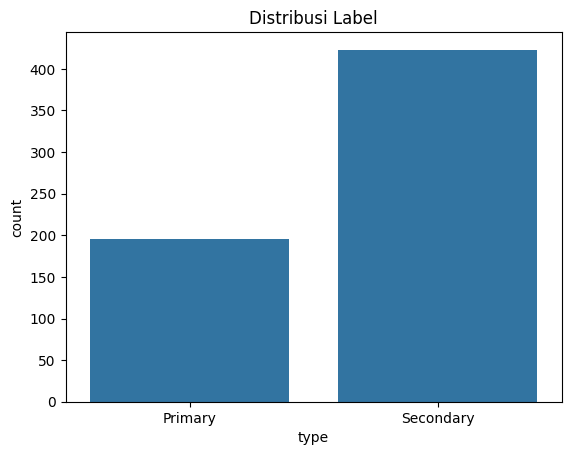

In [3]:
sns.countplot(x='type', data=df)
plt.title("Distribusi Label")
plt.show()